# Training the mnist model

In [1]:
import keras as kr
import tensorflowjs as tfjs
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre

Using TensorFlow backend.


In [2]:
import gzip

with gzip.open('files/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()
    
with gzip.open('files/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

Adapted from "Individual neurons in keras" video - moodle

In [3]:
# Create a new neural network
m = kr.models.Sequential()


In [4]:
type(file_content)

bytes

In [5]:
file_content[0:4]


b'\x00\x00\x08\x03'

In [6]:
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

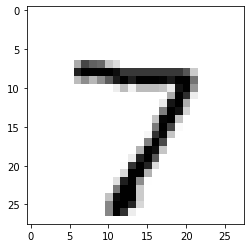

In [7]:
plt.imshow(image, cmap='gray')

In [8]:
int.from_bytes(labels[8:9], byteorder="big")

7

In [9]:
tf.compat.v1.disable_eager_execution()

## Adapted from learnonline notebook on reading MNIST

In [10]:
# Add a hidden layer with 1000 neurons and an input layer with 784.
m.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
m.add(kr.layers.Dense(units=400, activation='relu'))

# Add a three neuron output layer.
m.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
with gzip.open('files/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('files/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [12]:
inputs = train_img.reshape(60000, 784)

In [13]:
# For encoding categorical variables.

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [14]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


In [15]:
m.fit(inputs, outputs, epochs=8, batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/8





60000/60000 [==============================] - 13s 209us/step - loss: 0.5018 - acc: 0.8476
Epoch 2/8
60000/60000 [==============================] - 10s 161us/step - loss: 0.2178 - acc: 0.9328
Epoch 3/8
60000/60000 [==============================] - 11s 190us/step - loss: 0.1745 - acc: 0.9467
Epoch 4/8
60000/60000 [==============================] - 12s 198us/step - loss: 0.1516 - acc: 0.95380s - loss: 0.1532
Epoch 5/8
60000/60000 [==============================] - 11s 189us/step - loss: 0.1441 - acc: 0.9551
Epoch 6/8
60000/60000 [==============================] - 10s 167us/step - loss: 0.1269 - acc: 0.9608
Epoch 7/8
60000/60000 [==============================] - 10s 171us/step - loss: 0.1203 - acc: 0.96301s - los
Epoch 8/8
60000/60000 [==============================] - 10s 173us/step - loss: 0.1184 - acc: 0.9635


In [18]:
with gzip.open('files/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('files/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [19]:
(encoder.inverse_transform(m.predict(test_img)) == test_lbl).sum()

9660

In [20]:
m.predict(test_img[5:6])

array([[6.68374340e-12, 9.99995589e-01, 6.33728792e-10, 5.25455927e-13,
        1.98657773e-07, 2.92302189e-11, 2.72291963e-11, 4.09412769e-06,
        5.57960114e-08, 1.13927456e-07]], dtype=float32)

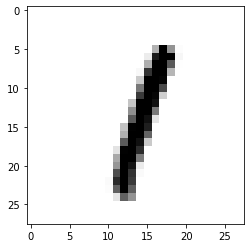

In [21]:
plt.imshow(test_img[5].reshape(28, 28), cmap='gray')


### Adapted from https://www.tensorflow.org/tutorials/keras/save_and_load

In [22]:
tfjs.converters.save_keras_model(m, 'models')